# Measuring Algorithmic Efficiency

## Overview

One of the most common problems in modern programming is the need to sort sets of data. Nowadays, all programming languages have some kind of sorting routines already built in, so it's highly unlikely that anyone would put an effort into writing their own sorting algorithm. However, analyzing and comparing different algorithms might be helpful to understand how they work, so we can choose the best one for a particular case. This paper will focus on bubble sort, merge sort and quick sort. Each of these sorting algorithms illustrate a different approach to sorting information. In the first part of this paper, we will analyze the algorithms and how they work, then, we will compare their performance in the second part.

## Bubble Sort

Let's start with bubble sort, one of the most basic sorting algorithms. It is a pretty simple algorithm where the highest value 'bubbles' its way up to the top. Basically, it starts with comparing the first two elements of an array to each other to see which is greater. If the first element is larger than the second, the two elements are swapped. Then, the algorithm advances to the next pair and performs the same comparison, swapping the values if the first one is greater. The process continues, till it examines the last element of the array and the largest value makes its way to the top. After it puts the largest value in its place, the process starts all over again, but now, it only examines the elements up to the one before the last item. The algorithm will perform sorting operations until the array is fully sorted. Let's now write some code.

In [20]:
def bubblesort(dataset):
    # start at the top
    for i in range(len(dataset) - 1, 0, -1):
        # examine elements
        for j in range(i):
            # swap items
            if dataset[j] > dataset[j + 1]:
                temp = dataset[j]
                dataset[j] = dataset[j + 1]
                dataset[j + 1] = temp

First, we write a loop that will examine every element in the array. Then we'll decrease by one each time because, as mentioned above, when the highest value reaches the top, the algorithm can skip it. This is why we are using a range function to count down from the end of the array. Therefore, the range is going to start at the length of the dataset minus one as this is the array's last item, stop at the zeroth item, and step by minus one each time. Then, inside this loop, we will include an inner loop to compare the neighboring elements and then swap them if needed. To achieve that, we need to do the comparisons. So, if the element at dataset j is greater than the one next to it, we will move it to a temporary variable and then switch them.

## Merge Sort

The merge sort is a so called divide-and-conquer algorithm. It takes a given set of data and breaks it down into smaller chunks, so the data is easier to work with. The algorithm uses recursion to break the data down, sort the smaller sets of data and then gradually work it's way back up to the original dataset. To understand how the merge sort works, the key is how to combine two sorted arrays together. Let's take a look at the code.

In [21]:
def mergesort(dataset):
    if len(dataset) > 1:
        mid = len(dataset) // 2
        leftarr = dataset[:mid]
        rightarr = dataset[mid:]

        # recursively break down the data set
        mergesort(leftarr)
        mergesort(rightarr)

        # combining the sets
        i=0 # left array
        j=0 # right array
        k=0 # merged array

        # only when both arrays have content
        while i < len(leftarr) and j < len(rightarr):
            if leftarr[i] < rightarr[j]:
                dataset[k] = leftarr[i]
                i += 1
            else:
                dataset[k] = rightarr[j]
                j += 1
            k += 1

        # if the left array still has values, add them
        while i < len(leftarr):
            dataset[k] = leftarr[i]
            i += 1
            k += 1

        # if the right array still has values, add them
        while j < len(rightarr):
            dataset[k] = rightarr[j]
            j += 1
            k += 1

We begin with taking the data set and breaking it down into two arrays. We find the middle of the original array and then we break it into two halves (left and right arrays). Now, we need to call the function recursively, which mean that the function is going to call itself, to keep breaking these arrays down further into smaller and smaller parts. As long as we have a dataset includes more than one element, the data sets will be divided into smaller pieces. Once the process is finished, the function will start to merge the elements. Then, we have three indexes: i indexes into the left array, j indexes into the right array, and k will index into the single merged array that we are building. While the i index is less than the length of the left array (there are still elements there) and while j is less than the length of the right array, we will compare the indexes of both arrays. Whichever value is lower will be then indexed by k in the single merged array that we're building back up. Both array containing the lower value and the target merged one will then increment one point. The algorithm will advance the merged array index so when this process completes, we will have merged and sorted values from left and right arrays. If we get to this point, it might happen that either left or right array will still have values. In this case we add them to the merged array.

## Quick Sort

The last algorithm that we are going to analyze is quicksort. Similarly to merge sort, it is also a divide-and-conquer algorithm utilizing recursion to perform its work, however, it usually is more efficient than the merge sort. moreover, quick sort also performs the sorting in place as opposed to creating new array, so it does not require extra memory to do its work. The main feature of the quick sort algorithm is the selection of the pivot point. There are various ways of picking the pivot position, and there are all kinds of papers and research done on this, however, just for simplicity, we will use the first item in the array. Below, you can see how quick sort works.

In [22]:
def quicksort(dataset, first, last):
    if first < last:
        # select the split point
        pivotidx = partition(dataset, first, last)

        # sort the partitions
        quicksort(dataset, first, pivotidx-1)
        quicksort(dataset, pivotidx + 1, last)


def partition(datavalues, first, last):
    # choose the pivot value
    pivotvalue = datavalues[first]
    # set the upper and lower indexes
    lower = first + 1
    upper = last

    # look for the crossing point
    done = False
    while not done:
        # increment the lower index
        while lower <= upper and datavalues[lower] <= pivotvalue:
            lower += 1

        # increment the upper index
        while datavalues[upper] >= pivotvalue and upper >= lower:
            upper -= 1

        # if the indexes cross, we receive the split point
        if upper < lower:
            done = True
        else:
            # swap the two values
            temp = datavalues[lower]
            datavalues[lower] = datavalues[upper]
            datavalues[upper] = temp

    # when the split point is found, swap the pivot value
    temp = datavalues[first]
    datavalues[first] = datavalues[upper]
    datavalues[upper] = temp

    # return new pivot value
    return upper

As you can see, the quick sort algorithm utilizes two functions. The first one, determines the pivot index by calling the partition function and then recursively calls itself on partitioned dataset. Now, let's analyze the process of partitioning the list. In a nutshell, the main purpose of the partitioning is to move elements that are on the wrong side of the pivot point and determine the point at which to split the array in order to recursively do this again. To achieve that, we add two indexes, the lower index and the upper index, and begin with incrementing the lower index, as long as it is less than the upper index, and until we find a value that's larger than the pivot value. Then, we mirror the same to the other side, namely we decrement the index as long as it's higher than the lower index and we find a value that is lower than the pivot value. We do that until we can no longer split arrays, where each array has one item. Comparing to the merge sort, where all the work gets done in the merge step, here most of the work is performed in the partition step and the data is being sorted in place.

# Measuring Efficiency

To measure the performance of algorythms, we are going to compare them based on their execution time and number of times the algorithms had to go through an array to sort it. The sample we will use to sort the numbers will be a random integers between 1 and 1000. To ensure that we use the same sample for every algorithm, we will use NumPy's random.seed function. Let's import some modules we are going to need.

In [23]:
import time
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [9.5, 6]

We are going to start with the generation of the sample.

In [24]:
np.random.seed(2)
nums = np.random.randint(low=1, high=1000, size=1000)

Now lets measure the time of Bubble Sort algorithim.

In [29]:
start = time.time()
bubblesort(nums)
end = time.time()
bs_time = end - start
print(f"Bubble Sort runtime: {bs_time:.5f}s")

start = time.time()
mergesort(nums)
end = time.time()
ms_time = end - start
print(f"Merge Sort runtime: {ms_time:.5f}s")

start = time.time()
quicksort(nums,0,len(nums)-1)
end = time.time()
qs_time = end - start
print(f"Quick Sort runtime: {qs_time:.5f}s")

Bubble Sort runtime: 0.12885s
Merge Sort runtime: 0.00603s
Quick Sort runtime: 0.06693s


Now, let's make a bar chart of the results we got.

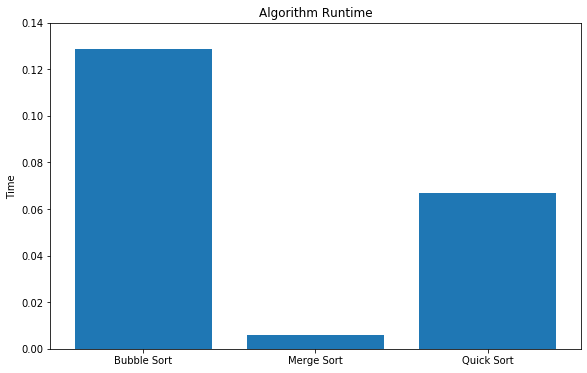

In [52]:
perf = [bs_time, ms_time, qs_time]
ind = np.arange(3)
plt.bar(ind, performance)
plt.ylabel('Time')
plt.title('Algorithm Runtime')
plt.xticks(ind, ('Bubble Sort', 'Merge Sort', 'Quick Sort'))
plt.yticks(np.arange(0, 0.16, 0.02))
plt.show()